In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

#import data
meta_data_path = r'C:\Users\Mason\nu-chi-data-pt-09-2020-u-c\05-Matplotlib\HW\Instructions\Pymaceuticals\data\Mouse_metadata.csv'
results_path = r'C:\Users\Mason\nu-chi-data-pt-09-2020-u-c\05-Matplotlib\HW\Instructions\Pymaceuticals\data\Study_results.csv'

meta_data = pd.read_csv(meta_data_path)
results = pd.read_csv(results_path)

meta_dataDF = pd.DataFrame(meta_data)
resultsDF = pd.DataFrame(results)

In [2]:
#clean data by removing entries with duplicate timepoints
cleaned_resultsDF = resultsDF
cleaned_resultsDF['Duplicate'] = cleaned_resultsDF.duplicated(['Mouse ID', 'Timepoint'], keep = False)

cleaned_resultsDF = cleaned_resultsDF[~cleaned_resultsDF.Duplicate]

del cleaned_resultsDF['Duplicate']
cleaned_resultsDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
#merge CSV files
merged_data = cleaned_resultsDF.merge(right = meta_dataDF, how = 'inner', on = 'Mouse ID')

tumor_data = merged_data.drop(['Mouse ID', 'Timepoint', 'Metastatic Sites', 'Age_months', 'Sex', 'Weight (g)'], axis = 1)
tumor_data

,Tumor Volume (mm3),Drug Regimen
0,45.000000,Capomulin
1,45.651331,Capomulin
2,43.270852,Capomulin
3,43.784893,Capomulin
4,42.731552,Capomulin
...,...,...
1878,31.378045,Capomulin
1879,28.430964,Capomulin
1880,56.045564,Propriva
1881,59.082294,Propriva


In [4]:
#summary stat table including mean, median, variance, standard deviation, and Std Error of Mean for Tumor Volume
meanDF = tumor_data.groupby('Drug Regimen').mean()
medianDF = tumor_data.groupby('Drug Regimen').median()
varianceDF = tumor_data.groupby('Drug Regimen').var()
stddevDF = tumor_data.groupby('Drug Regimen').std()
stderrorDF = tumor_data.groupby('Drug Regimen').sem()

regimen_data = meanDF.merge(right = medianDF, how = 'inner', on = 'Drug Regimen')
regimen_data = regimen_data.merge(right = varianceDF, how = 'inner', on = 'Drug Regimen')
regimen_data = regimen_data.merge(right = stddevDF, how = 'inner', on = 'Drug Regimen')
regimen_data = regimen_data.merge(right = stderrorDF, how = 'inner', on = 'Drug Regimen')
regimen_data.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'Standard Error of Mean']
regimen_data

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


(0.0, 250.0)

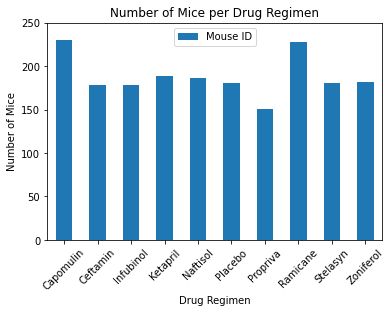

In [27]:
#finding number of mice for each drug regimen
mouse_data = merged_data.drop(['Tumor Volume (mm3)', 'Timepoint', 'Metastatic Sites', 'Age_months', 'Sex', 'Weight (g)'], axis = 1)
mouse_data = mouse_data.groupby('Drug Regimen').count()
mouse_data

#bar chart for mice per drug regimen using Pandas
mouse_data.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen')
plt.xticks(rotation=45)
plt.ylim(0, 250)

(0.0, 250.0)

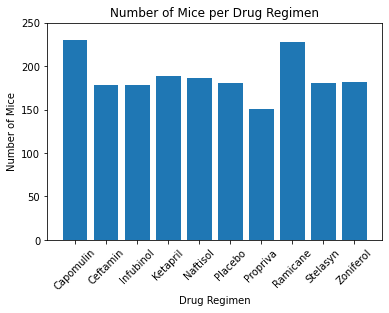

In [26]:
#bar chart for mice per drug regimen using Matplotlib
plt.bar(mouse_data.index, mouse_data['Mouse ID'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen')
plt.xticks(rotation=45)
plt.ylim(0, 250)

Text(0.5, 1.0, 'Male vs. Female Mice Studied')

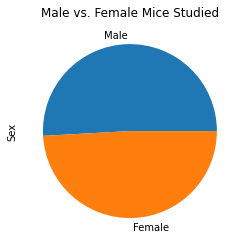

In [18]:
#isolating gender data
gender_data = merged_data.drop(['Tumor Volume (mm3)', 'Timepoint', 'Metastatic Sites', 'Age_months', 'Mouse ID', 'Weight (g)', 'Drug Regimen'], axis = 1)
gender_data = gender_data['Sex'].value_counts()
gender_data

#pie plots using Pandas
gender_data.plot(kind = 'pie')
plt.title('Male vs. Female Mice Studied')

Text(0.5, 1.0, 'Male vs. Female Mice Studied')

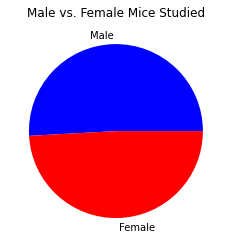

In [17]:
#pie plots using Matplotlib
plt.pie(gender_data, labels = ['Male', 'Female'], colors = ['blue', 'red'])
plt.title('Male vs. Female Mice Studied')

In [63]:
#tumor volume of each mouse across Capomulin, Ramicane, Infubinol, and Ceftamin
final_volume_data = merged_data.drop(['Metastatic Sites', 'Age_months', 'Sex', 'Weight (g)'], axis = 1)
final_volume_data.drop(final_volume_data.index[final_volume_data['Drug Regimen'] == 'Placebo'], inplace = True)
final_volume_data.drop(final_volume_data.index[final_volume_data['Drug Regimen'] == 'Stelasyn'], inplace = True)
final_volume_data.drop(final_volume_data.index[final_volume_data['Drug Regimen'] == 'Zoniferol'], inplace = True)
final_volume_data.drop(final_volume_data.index[final_volume_data['Drug Regimen'] == 'Ketapril'], inplace = True)
final_volume_data.drop(final_volume_data.index[final_volume_data['Drug Regimen'] == 'Propriva'], inplace = True)
final_volume_data.drop(final_volume_data.index[final_volume_data['Drug Regimen'] == 'Naftisol'], inplace = True)
final_volume_data = final_volume_data.groupby(['Drug Regimen', 'Mouse ID']).last()
del final_volume_data['Timepoint']
print(final_volume_data)

#quartiles and IQRs, determine outliers
quartile1 = float(final_volume_data.quantile(q = 0.25))
quartile2 = float(final_volume_data.quantile(q = 0.5))
quartile3 = float(final_volume_data.quantile(q = 0.75))
iqr = quartile3 - quartile1
lower_bound = quartile1 - (iqr * 1.5)
upper_bound = quartile3 + (iqr * 1.5)

print('Q1:', quartile1)
print('Q2:', quartile2)
print('Q3:', quartile3)
print('IQR:', iqr)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

#Outliers
outlier =[] 
for x in final_volume_data['Tumor Volume (mm3)']: 
    if (x > upper_bound) or (x < lower_bound): 
         outlier.append(x) 
outlier

                       Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]
Q1: 37.187743802499995
Q2: 45.0
Q3: 59.930261755000004
IQR: 22.74251795250001
Lower Bound: 3.0739668737499812
Upper Bound: 94.04403868375002


[]

Text(0.5, 0.98, '')

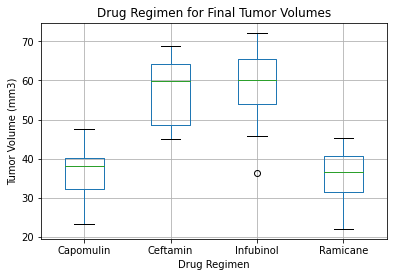

In [69]:
#box and whisker plot of above data
final_volume_data.boxplot(column = 'Tumor Volume (mm3)', by = 'Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Drug Regimen for Final Tumor Volumes')
plt.suptitle("")

Text(0.5, 1.0, 'Mouse b128 Average Tumor Volume over Time')

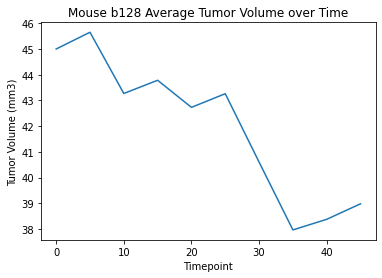

In [46]:
#muning dataframe
capMice = merged_data.drop(['Metastatic Sites', 'Age_months', 'Sex'], axis = 1)
capMice.drop(capMice.index[capMice['Drug Regimen'] != 'Capomulin'], inplace = True)

#isolating single Capomulin mouse
capMouse = capMice.drop(capMice.index[11:])
capMouse.drop(capMouse.tail(1).index,inplace=True)

#defining axis
x_axis = capMouse['Timepoint']
y_axis = capMouse['Tumor Volume (mm3)']

#line plot for a Capomulin mouse, volume vs. time
plt.plot(x_axis, y_axis)

#plot formatting
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse b128 Average Tumor Volume over Time')

(0.0, 50.0)

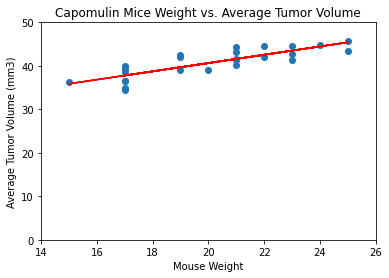

In [40]:
#defining axis
capmiceMean = capMice.groupby('Mouse ID').mean()
capmiceMean = capmiceMean['Tumor Volume (mm3)']
capmiceMean

capmiceWeight = capMice.groupby('Mouse ID').max()
capmiceWeight = capmiceWeight['Weight (g)']
capmiceWeight

#scatter plot for all Capomulin mice, weight vs. average tumor volume
plt.scatter(capmiceWeight, capmiceMean)

#calculate linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capmiceWeight, capmiceMean)

#plot above onto scatterplot
plt.plot(capmiceWeight, intercept + slope * capmiceWeight, 'red')

#plot formatting
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Mice Weight vs. Average Tumor Volume')
plt.xlim(14, 26)
plt.ylim(0, 50)